## *Data*
Download `annotations.zip` and `audio_mono-mic.zip` from https://zenodo.org/records/3371780.

In [ ]:
!wget -O annotation.zip https://zenodo.org/records/3371780/files/annotation.zip?download=1
!wget -O audio_mono-mic.zip https://zenodo.org/records/3371780/files/audio_mono-mic.zip?download=1

--2024-12-05 20:13:36--  https://zenodo.org/records/3371780/files/annotation.zip?download=1
Resolving zenodo.org (zenodo.org)... 188.185.43.25, 188.185.45.92, 188.185.48.194, ...
Connecting to zenodo.org (zenodo.org)|188.185.43.25|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 39132574 (37M) [application/octet-stream]
Saving to: ‘annotation.zip’

annotation.zip      100%[===================>]  37.32M  9.74MB/s    in 3.8s    

2024-12-05 20:13:41 (9.74 MB/s) - ‘annotation.zip’ saved [39132574/39132574]

--2024-12-05 20:13:41--  https://zenodo.org/records/3371780/files/audio_mono-mic.zip?download=1
Resolving zenodo.org (zenodo.org)... 188.185.43.25, 188.185.45.92, 188.185.48.194, ...
Connecting to zenodo.org (zenodo.org)|188.185.43.25|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 656927981 (626M) [application/octet-stream]
Saving to: ‘audio_mono-mic.zip’

audio_mono-mic.zip  100%[===================>] 626.50M  7.72MB/s    in 81s     

In [ ]:
!pip install librosa numpy matplotlib h5py

In [ ]:
import os
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

# Paths
annotation_zip_path = '/content/annotation.zip'
audio_zip_path = '/content/audio_mono-mic.zip'

# Create directories and unzip files
os.makedirs('guitarset/annotation', exist_ok=True)
os.makedirs('guitarset/audio', exist_ok=True)
!unzip -o "$annotation_zip_path" -d guitarset/annotation
!unzip -o "$audio_zip_path" -d guitarset/audio

# Define paths
audio_dir = 'guitarset/audio/'
annotation_dir = 'guitarset/annotation/'

Archive:  /content/annotation.zip
  inflating: guitarset/annotation/03_SS1-100-C#_comp.jams  
  inflating: guitarset/annotation/04_Jazz2-110-Bb_solo.jams  
  inflating: guitarset/annotation/03_Rock1-90-C#_comp.jams  
  inflating: guitarset/annotation/03_Rock2-142-D_solo.jams  
  inflating: guitarset/annotation/01_SS3-98-C_comp.jams  
  inflating: guitarset/annotation/02_Funk1-114-Ab_comp.jams  
  inflating: guitarset/annotation/00_SS3-98-C_solo.jams  
  inflating: guitarset/annotation/02_BN1-129-Eb_comp.jams  
  inflating: guitarset/annotation/02_Funk3-112-C#_comp.jams  
  inflating: guitarset/annotation/00_Jazz2-187-F#_solo.jams  
  inflating: guitarset/annotation/04_Rock1-90-C#_solo.jams  
  inflating: guitarset/annotation/01_Rock3-117-Bb_solo.jams  
  inflating: guitarset/annotation/04_Rock2-142-D_comp.jams  
  inflating: guitarset/annotation/01_Jazz1-130-D_solo.jams  
  inflating: guitarset/annotation/05_Funk2-108-Eb_solo.jams  
  inflating: guitarset/annotation/04_Jazz3-137-Eb_com

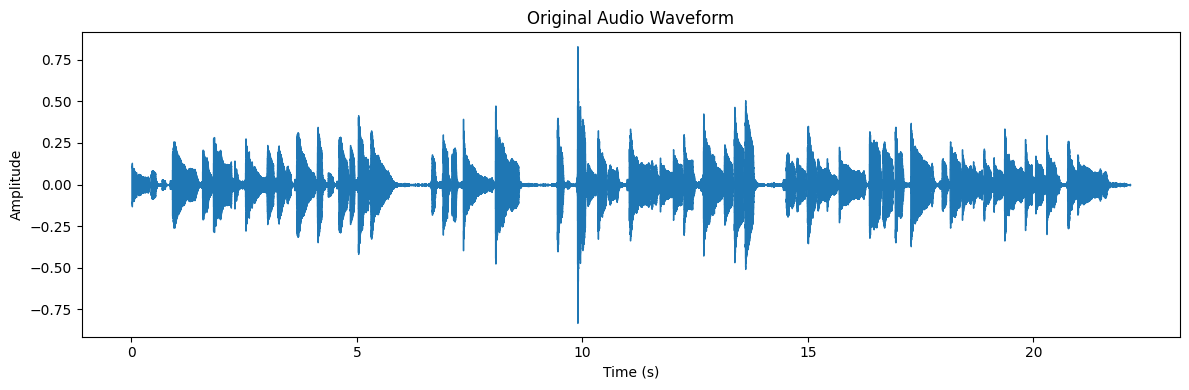

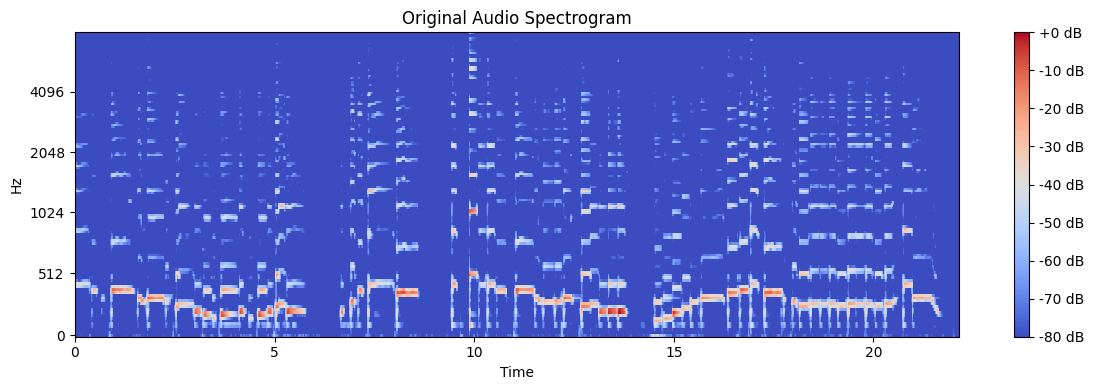

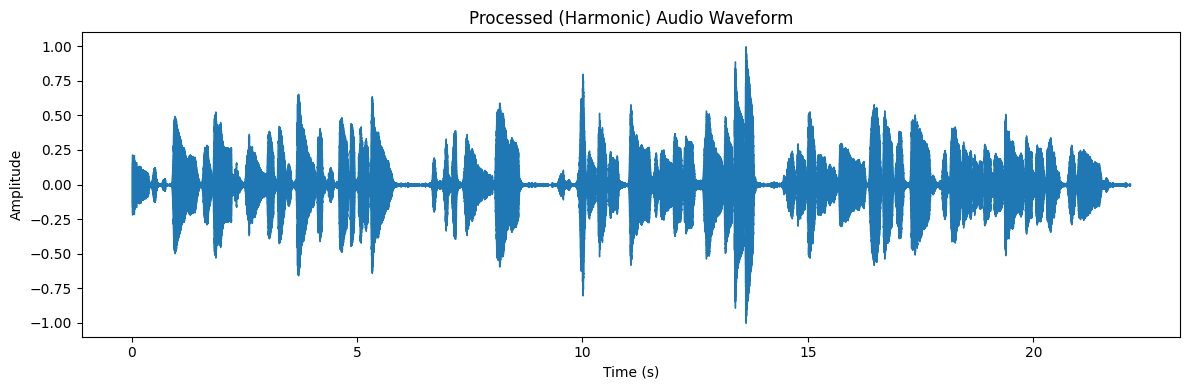

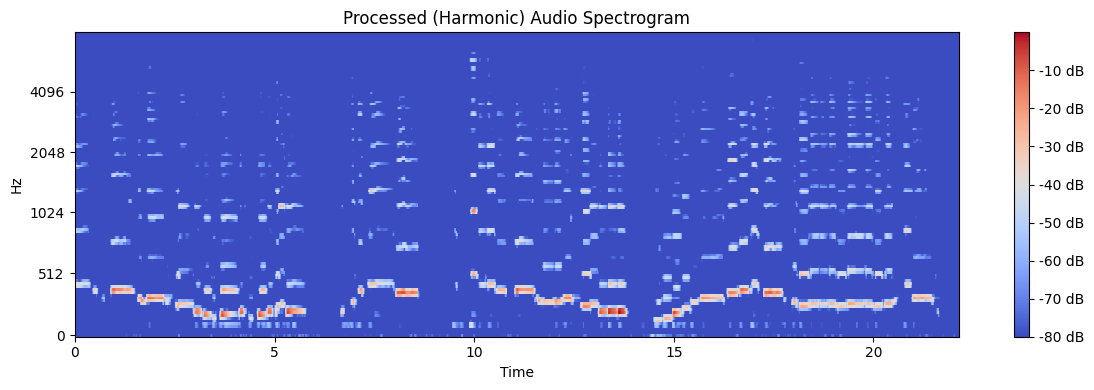

In [ ]:
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt
import zipfile
from IPython.display import Audio, display
import ipywidgets as widgets

# ------------------------------
# Paths for Dataset
# ------------------------------
annotation_zip_path = '/content/annotation.zip'
audio_zip_path = '/content/audio_mono-mic.zip'

# Create directories for extraction
os.makedirs('guitarset/annotation', exist_ok=True)
os.makedirs('guitarset/audio', exist_ok=True)

# Extract the zip files
with zipfile.ZipFile(audio_zip_path, 'r') as zip_ref:
    zip_ref.extractall('guitarset/audio')

# ------------------------------
# Preprocessing and Filtering (Using HPSS for Guitar Isolation)
# ------------------------------
def preprocess_audio_with_hpss(file_path, sr=22050):
    """Preprocess audio by applying HPSS, normalizing, and computing spectrogram."""
    y, sr = librosa.load(file_path, sr=sr)
    harmonic, percussive = librosa.effects.hpss(y)
    harmonic = librosa.util.normalize(harmonic)
    return y, harmonic, sr

# ------------------------------
# Visualization Functions
# ------------------------------
def plot_waveform(y, sr, title="Waveform"):
    """Plot the waveform of the audio."""
    plt.figure(figsize=(12, 4))
    librosa.display.waveshow(y, sr=sr)
    plt.title(title)
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.tight_layout()
    plt.show()

def plot_spectrogram(y, sr, title="Spectrogram"):
    """Plot the spectrogram of the audio."""
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)
    S_dB = librosa.amplitude_to_db(S, ref=np.max)
    plt.figure(figsize=(12, 4))
    librosa.display.specshow(S_dB, x_axis='time', y_axis='mel', sr=sr, fmax=8000, cmap='coolwarm')
    plt.colorbar(format='%+2.0f dB')
    plt.title(title)
    plt.tight_layout()
    plt.show()

# ------------------------------
# Manual Playback Functions
# ------------------------------
def manual_play_audio(y, sr, title="Audio"):
    """Create a manual audio player for playback."""
    audio_widget = Audio(y, rate=sr)
    display(audio_widget)

# ------------------------------
# Example Usage
# ------------------------------
def process_and_play_audio(song_name):
    # Search for the specified song name
    audio_files = [f for f in os.listdir('guitarset/audio') if f.endswith('.wav')]
    audio_file_path = next((os.path.join('guitarset/audio', f) for f in audio_files if song_name in f), None)

    if audio_file_path:
        # Step 1: Load and visualize original audio
        original_y, original_sr = librosa.load(audio_file_path, sr=22050)
        plot_waveform(original_y, original_sr, title="Original Audio Waveform")
        plot_spectrogram(original_y, original_sr, title="Original Audio Spectrogram")
        manual_play_audio(original_y, original_sr, title="Original Audio")

        # Step 2: Preprocess audio
        original_y, harmonic_y, harmonic_sr = preprocess_audio_with_hpss(audio_file_path)
        plot_waveform(harmonic_y, harmonic_sr, title="Processed (Harmonic) Audio Waveform")
        plot_spectrogram(harmonic_y, harmonic_sr, title="Processed (Harmonic) Audio Spectrogram")
        manual_play_audio(harmonic_y, harmonic_sr, title="Processed Harmonic Audio")

        return original_y, harmonic_y, harmonic_sr
    else:
        print(f"No audio file found with name containing '{song_name}'.")

# ------------------------------
# Execute the function
# ------------------------------
song_name = '05_Rock1-130-A_solo_mic.wav'  # Replace with the desired song name
original_y, harmonic_y, harmonic_sr = process_and_play_audio(song_name)


In [ ]:
def detect_pitch_aligned_to_beats(harmonic_y, harmonic_sr):
    """Detect pitches in the harmonic (guitar) audio aligned to a 4/4 beat structure."""
    # Estimate tempo and beat frames
    tempo, beat_frames = librosa.beat.beat_track(y=harmonic_y, sr=harmonic_sr, units='frames')

    # Perform pitch tracking
    pitches, magnitudes = librosa.core.piptrack(y=harmonic_y, sr=harmonic_sr)

    detected_pitches = []
    # Filter pitches based on beat frames
    for beat in beat_frames:
        # Get the time frame closest to each beat
        magnitudes_at_beat = magnitudes[:, beat]
        max_index = magnitudes_at_beat.argmax()  # Index of highest magnitude at this beat
        pitch_at_beat = pitches[max_index, beat]  # Corresponding pitch

        if pitch_at_beat > 0:  # Consider only non-zero pitches
            detected_pitches.append(pitch_at_beat)

    return detected_pitches

# Example usage:
# Load your audio file
detected_pitches = detect_pitch_aligned_to_beats(harmonic_y, harmonic_sr)
print(f"Detected pitches aligned with beats: {detected_pitches[:10]}")  # Print the first 10 detected pitches

Detected pitches aligned with beats: [329.1502, 294.81644, 278.23868, 195.87103, 195.48602, 220.29431, 195.27693, 260.88705, 223.85744, 208.43408]


In [ ]:
import numpy as np
import librosa

def detect_pitches_aligned_to_beats(y, sr):
    """Detect pitches in the audio aligned to beats, capturing multiple pitches per beat."""
    # Estimate tempo and beat frames
    tempo, beat_frames = librosa.beat.beat_track(y=y, sr=sr, units='frames')

    # Perform pitch tracking using the probabilistic YIN algorithm for improved accuracy
    f0, voiced_flag, voiced_probs = librosa.pyin(y, fmin=librosa.note_to_hz('E2'),
                                                 fmax=librosa.note_to_hz('E6'), sr=sr)
    times = librosa.times_like(f0, sr=sr)
    frames = librosa.time_to_frames(times, sr=sr)

    detected_pitches_per_beat = []
    for beat in beat_frames:
        # Get indices corresponding to the beat
        beat_time = librosa.frames_to_time(beat, sr=sr)
        indices = np.where((times >= beat_time) & (times < beat_time + (60/tempo)/4))[0]

        pitches_at_beat = f0[indices]
        pitches_at_beat = pitches_at_beat[~np.isnan(pitches_at_beat)]  # Remove unvoiced frames

        # Capture the most common pitches within the beat (mode)
        if pitches_at_beat.size > 0:
            counts = np.bincount(librosa.hz_to_midi(pitches_at_beat).astype(int))
            common_pitches = librosa.midi_to_hz(np.argsort(counts)[-3:])  # Top 3 pitches
            detected_pitches_per_beat.append(common_pitches)
        else:
            detected_pitches_per_beat.append([])
    return detected_pitches_per_beat

def generate_fretboard():
    """Generates a mapping of string and fret to frequency."""
    string_frequencies = {
        "E2": 82.41,  # Low E
        "A2": 110.00,
        "D3": 146.83,
        "G3": 196.00,
        "B3": 246.94,
        "E4": 329.63   # High E
    }
    fretboard = {}
    for string, open_freq in string_frequencies.items():
        frets = {}
        for fret in range(0, 25):  # Standard guitars have up to 24 frets
            freq = open_freq * (2 ** (fret / 12))
            frets[fret] = freq
        fretboard[string] = frets
    return fretboard

def find_possible_strings_and_frets(pitch, fretboard, tolerance_cents=25):
    """Finds all possible strings and frets that can play the given pitch within a tolerance."""
    possible_notes = []
    for string, frets in fretboard.items():
        for fret, freq in frets.items():
            # Compute the difference in cents between the pitch and the fret frequency
            cents_diff = 1200 * np.log2(pitch / freq)
            if abs(cents_diff) <= tolerance_cents:
                possible_notes.append((string, fret, abs(cents_diff)))
    return possible_notes

def generate_guitar_tab(detected_pitches_per_beat, fretboard):
    """Generates guitar tab given detected pitches per beat."""
    tab = {string: [] for string in fretboard}  # Initialize tab lines for each string
    for pitches_at_beat in detected_pitches_per_beat:
        # Initialize beat representation for each string
        beat_frets = {string: "-" for string in fretboard}
        for pitch in pitches_at_beat:
            possible_notes = find_possible_strings_and_frets(pitch, fretboard)
            if possible_notes:
                # Select the note with the smallest fret number for easier playability
                string, fret, _ = min(possible_notes, key=lambda x: (x[1], x[2]))
                # Add fret number to the beat_frets
                beat_frets[string] = str(fret)
        # Append the beat_frets to the tab
        for string in fretboard:
            tab[string].append(beat_frets[string])
    return tab

def compact_tabs_chords(tab):
    string_order = ["E4", "B3", "G3", "D3", "A2", "E2"]
    formatted_tabs = []
    for string in string_order:
        frets = tab[string]
        formatted_tabs.append(f"{string}: " + " ".join(frets))
    return "\n".join(formatted_tabs)

# Example usage:

# Assuming 'harmonic_y' and 'harmonic_sr' are already defined and contain your audio data
detected_pitches_per_beat = detect_pitches_aligned_to_beats(harmonic_y, harmonic_sr)
fretboard = generate_fretboard()
guitar_tab = generate_guitar_tab(detected_pitches_per_beat, fretboard)
formatted_tab = compact_tabs_chords(guitar_tab)
print("Formatted Guitar Tabs (Chords-like Representation):\n")
print(formatted_tab)

Formatted Guitar Tabs (Chords-like Representation):

E4: 0 - - - - - - - - - - - 5 5 2 2 - - 8 5 0 3 - 0 - - - - - - - 0 2 3 4 2 - - - - - - 5
B3: - 3 2 - - - - 1 - - - 2 - - - - - - - - - - 3 - 1 - - - - - 2 - 4 - - - 2 2 2 2 2 2 -
G3: - - - 0 0 1 0 - 2 - - - - - - - - - - - - - - - - 2 2 - - 1 - - - - - - - - - - - - -
D3: - - - 4 4 - 4 - - - - - - - - - - - - - - - - - - - - - 0 - - - - - - - - - - - - - -
A2: - - - - - - - - - 0 - - - - - - - - - - - - - - - - - 0 - - - - - - - - - - - - - - -
E2: - - - - - - - - - - 4 - - - - - - 4 - - - - - - - - - 4 - - - - - - - - - - - - - - -


Values in the output above such as: 6, 3, 4, 7, 22 etc., all represent the frets played on that string.

- Fret 0 = open string
- Fret 3 = pressing the string down on the third fret
- Fret x = pressing the string down on the xth fret

...

How to Read the Output:
E2 0 3 5 6:

For the low E string (E2), you play the open string (0), then press the 3rd fret (3), then the 5th fret (5), and the 6th fret (6), in sequence.


If the output is:

E2 0 3 5 6

A2 0 2 3 5

D3 2 4 5 7

G3 2 4 6 7

B3 3 5 7 8

E4 5 7 8 10


This is how you would play it:

E2 String (Low E):
Play open E string (no finger pressed, "0").
Press the 3rd fret.
Press the 5th fret.
Press the 6th fret.
A2 String:
Play open A string.
Press the 2nd fret.
Press the 3rd fret.
Press the 5th fret.
Continue this process for the other strings.